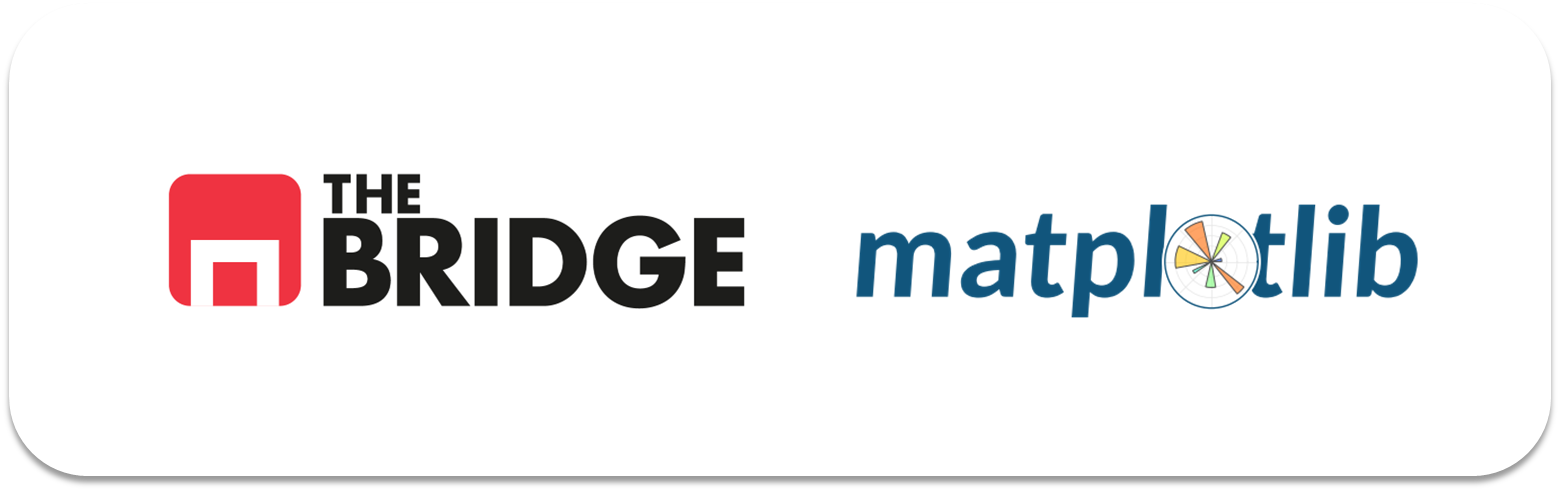

# Visualización con Matplotlib: Subplots

Como ya sabemos de nuestros análisis del sprint anterior,  **muchas veces es útil comparar diferentes vistas de datos lado a lado.**
Para este fin, Matplotlib tiene el concepto de *subplots*: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura.
Estos subplots podrían ser inserciones, cuadrículas de gráficos u otros diseños más complicados y además no tienen por qué ser del mismo tipo.  

En esta sección exploraremos como crear subplots en Matplotlib.
```

Importamos como siempre:

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-white")
import numpy as np

x = np.linspace(0,10,100)


### "A mano"

El método más básico para crear un eje es usar la función ``plt.axes``.
Como hemos visto anteriormente, de forma predeterminada esto crea un objeto de eje estándar que llena toda la figura.
``plt.axes`` también toma un argumento opcional que es una lista de cuatro números en el sistema de coordenadas de la figura.
Estos números representan ``[izquierda, inferior, ancho, altura]`` en el sistema de coordenadas de la figura, que varía de 0 en la esquina inferior izquierda de la figura a 1 en la esquina superior derecha de la figura.

Por ejemplo, podríamos crear un eje secundario en la esquina superior derecha de otro eje estableciendo la posición *x* y *y* en 0.65 (es decir, comenzando en el 65% del ancho y el 65% de la altura de la figura) y las extensiones *x* y *y* en 0.2 (es decir, el tamaño del eje es el 20% del ancho y el 20% de la altura de la figura):


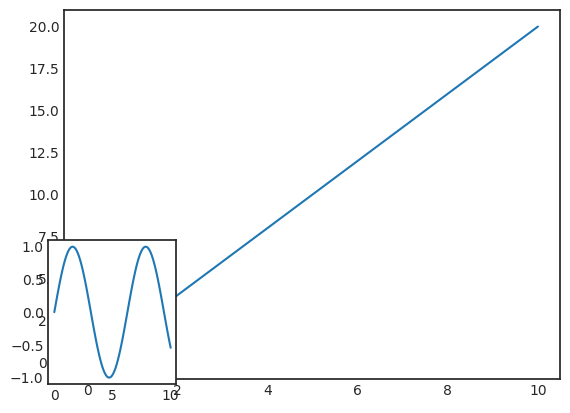

In [5]:
ax1 = plt.axes()
ax2 = plt.axes([0.1,0.1,0.2,0.3])
ax1.plot(x, 2*x)
ax2.plot(x, np.sin(x));

El equivalente de este comando dentro de la interfaz orientada a objetos es ``fig.add_axes()``. Usemos esto para crear dos ejes apilados verticalmente:

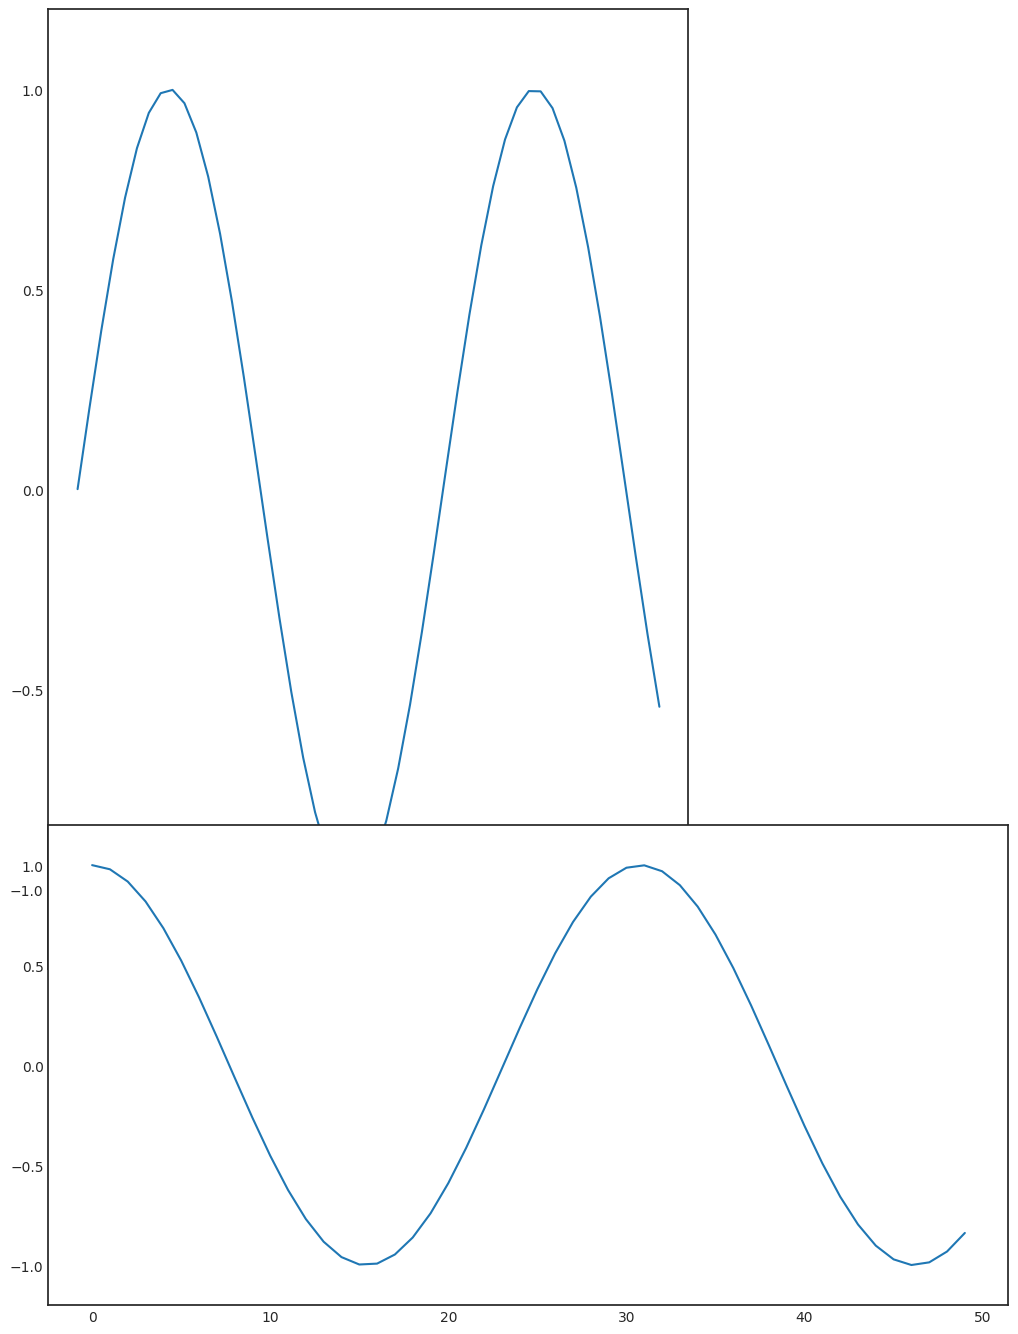

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 1, 1, 2],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.3, 1.5, 1],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));


### Con cuadrículas sencillas

Las columnas o filas alineadas de *subplots* o gráficas formando cuadrículas o matrices son una necesidad lo suficientemente común como para que Matplotlib tenga varias rutinas de conveniencia que las hacen fáciles de crear.

El nivel más bajo de éstas es ``plt.subplot()``, este comando tiene tres argumentos enteros: el número de filas, el número de columnas y el índice de la gráfica que se creará en este esquema, que va desde la esquina superior izquierda hasta la esquina inferior derecha.


Vamos a crear una figura con una matriz de subplots o gráficas de 3x5, y las numeraremos con su índice para que te quede más claro:

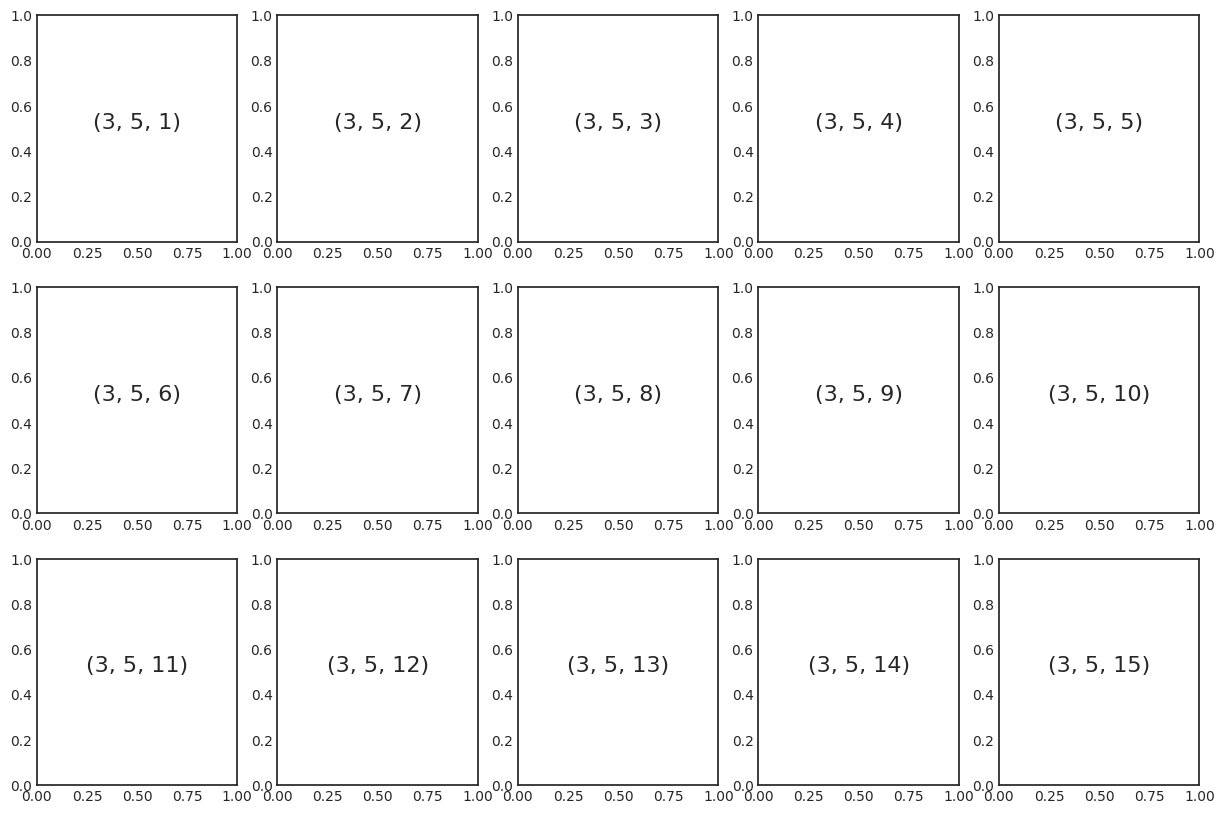

In [10]:
plt.figure(figsize=(15,10))
for i in range(1,16): #empieza a contar en 1 no en 0
    plt.subplot(3,5,i)
    plt.text(0.5,0.5,str((3,5,i)), fontsize = 16, ha="center")

El comando ``plt.subplots_adjust`` se puede usar para ajustar el espaciado entre estos gráficos.
El siguiente código utiliza el comando orientado a objetos equivalente, ``fig.add_subplot()``:

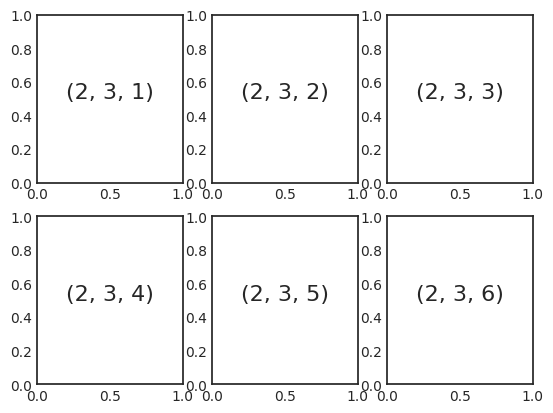

In [16]:
plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 1)
for i in range(1,7): #empieza a contar en 1 no en 0
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)), fontsize = 16, ha="center")

Hemos utilizado los argumentos ``hspace`` y ``wspace`` de ``plt.subplots_adjust``, que especifican el **espaciado a lo largo de la altura y anchura de la figura**, en unidades del tamaño del subtrazado (en este caso, el espacio es el 40% de la anchura y altura del subtrazado).


### La cuadrícula completa de una vez

**La aproximación anterior puede volverse bastante tediosa si queremos crear una cuadrícula o matriz grande, especialmente si se desea ocultar las etiquetas del eje x y y en las tramas internas.**  

Para este propósito, ``plt.subplots()`` es la herramienta más fácil de usar (nota la ``s`` al final de ``subplots``). En lugar de crear una sola subtrama, esta función crea una cuadrícula completa de subtramas en una sola línea, devolviéndolas en un array de NumPy.
Los argumentos son el número de filas y el número de columnas, junto con palabras clave opcionales ``sharex`` y ``sharey``, que le permiten especificar las relaciones entre diferentes ejes.  


Aquí crearemos una cuadrícula de $2 \times 3$ subtramas, donde todos los ejes en la misma fila comparten su escala en el eje y, y todos los ejes en la misma columna comparten su escala en el eje x:
```

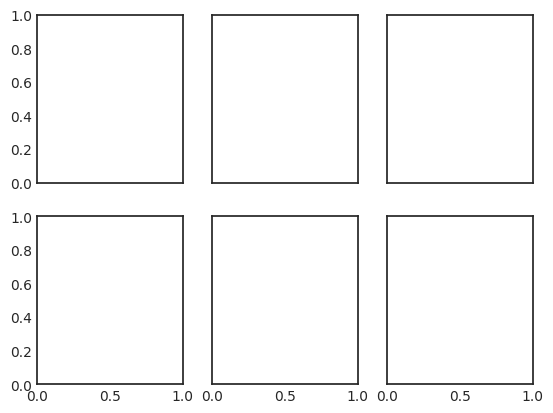

In [17]:
fig,ax = plt.subplots(2,3, sharex="col", sharey="row")

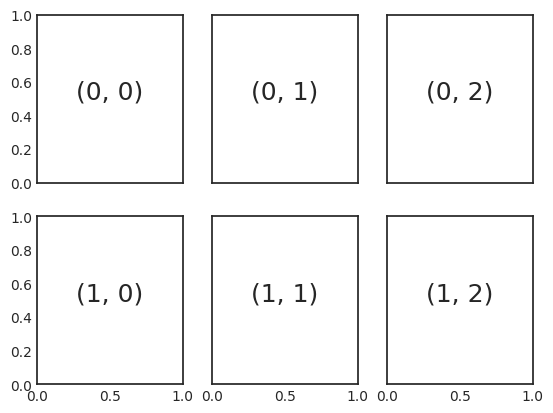

In [18]:
# Los axes están en un array bidimensional accedido por [fila,columna] tipo python, 
# empezando en cero
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5, str((i,j)), fontsize= 18, ha="center")
fig

Si queremos acceder a cualquiera de los gráficos podemos acceder a partir del elemento del array de objetos en "ax" (tal como hemos añadido los textos):

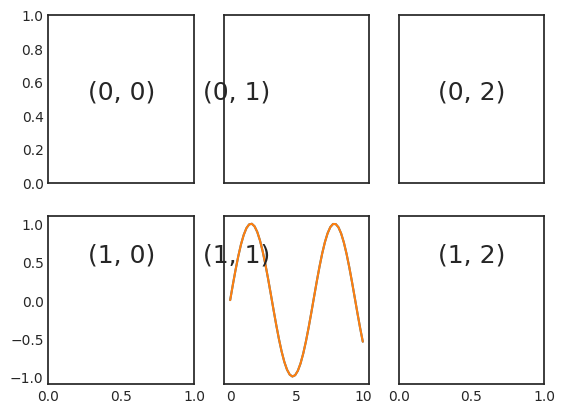

In [20]:
ax[1,1].plot(x, np.sin(x));
fig

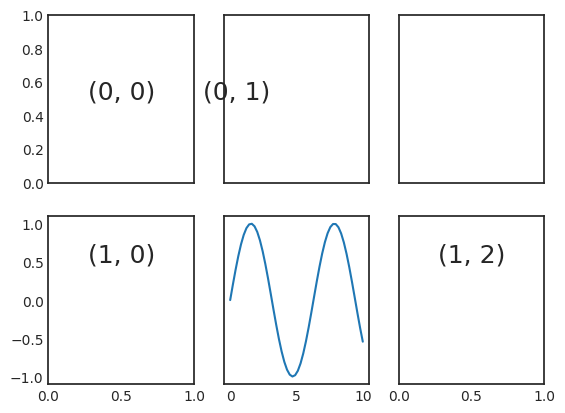

In [21]:
# Te dejo aquí como haríamos para quitar el texto:
fig, ax = plt.subplots(2, 3, sharex = "col", sharey = "row")
textos = np.full(fill_value= None, shape= ax.shape)
for i in range(2):
    for j in range(3):  
        textos[i,j] = ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
textos[0,2].remove()
textos[1,1].remove()
ax[1,1].plot(x,np.sin(x));
